In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_index= pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
# Drop unnecessary column

df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [4]:
# Check null value

df_index.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

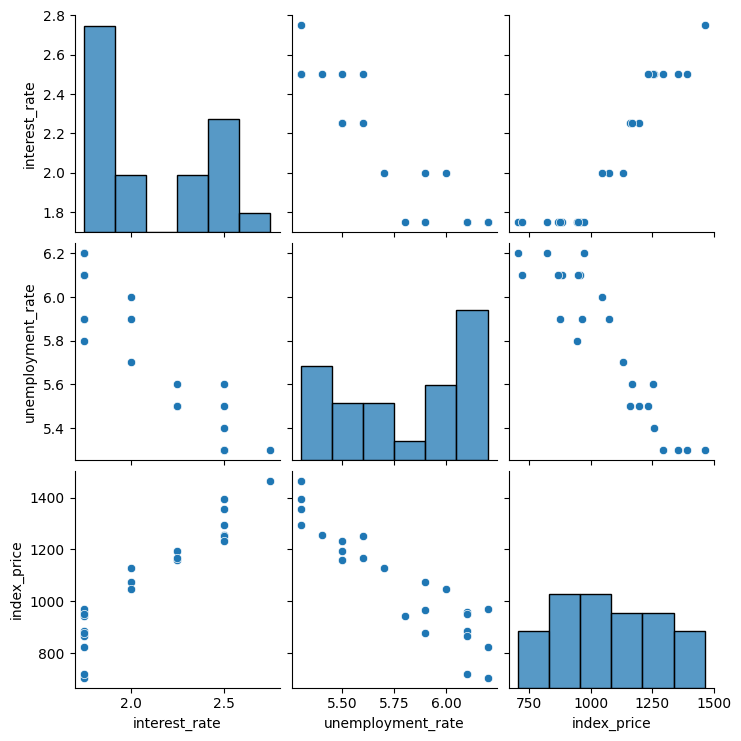

In [5]:
# Visulalization\

sns.pairplot(df_index)

In [6]:
# Correlation
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

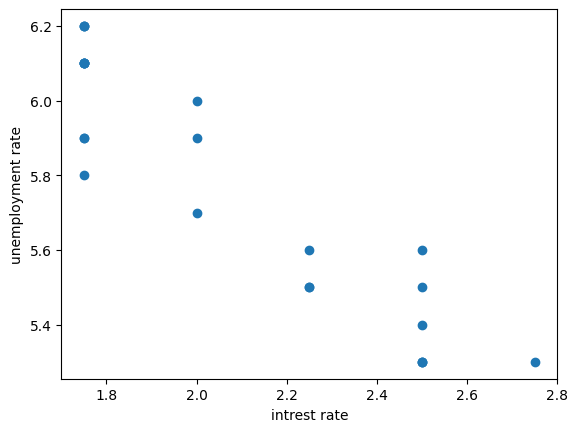

In [7]:
# visualize more clearly

plt.scatter(df_index["interest_rate"],df_index['unemployment_rate'])
plt.xlabel("intrest rate")
plt.ylabel('unemployment rate')


In [7]:
# independent and dependent feature
X= df_index[['interest_rate','unemployment_rate']]

#we can also use in this way
# X= df_index.iloc[:,:-1]

Y= df_index.iloc[:,-1]


In [9]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [5]:
#tarin test split
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=.25, random_state=56)

<Axes: xlabel='index_price', ylabel='interest_rate'>

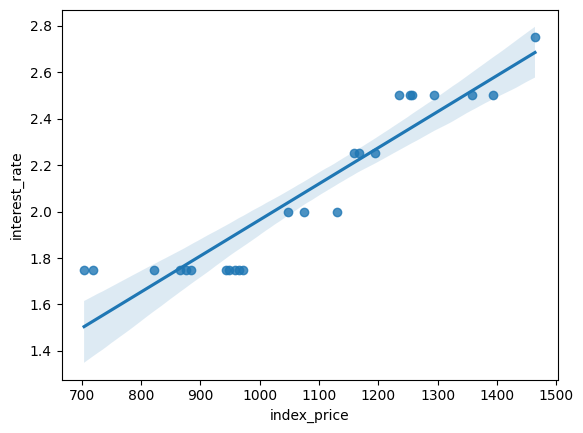

In [12]:
sns.regplot(y=df_index['interest_rate'],x=df_index['index_price'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

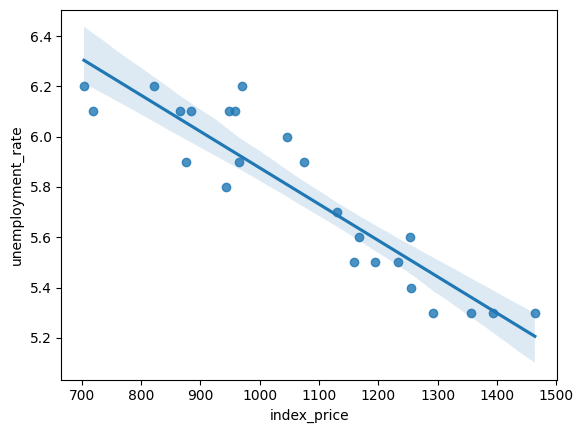

In [9]:
sns.regplot(y=df_index['unemployment_rate'],x=df_index['index_price'])

In [10]:
# standardization 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [13]:
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# Cross Validation
from sklearn.model_selection import cross_val_score
crossval=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)
np.mean(crossval)  # The output will be scoring that is negatice mean squared error

np.float64(-6368.911404868447)

In [15]:
# Prediction
Y_pred = regression.predict(X_test)
Y_pred

array([1209.61589031,  892.01333584, 1274.19402705,  939.12490609,
       1344.86138242,  892.01333584])

In [16]:
# performance matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

6156.533095112391
57.92884422739786
78.4635781436992


In [17]:
# R square and adjusted r square

from sklearn.metrics import r2_score
score = r2_score(Y_test, Y_pred)
print(score)

adjusted_rsquare = 1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print(adjusted_rsquare)

0.8594748189034398
0.7657913648390663


## Assumptions 

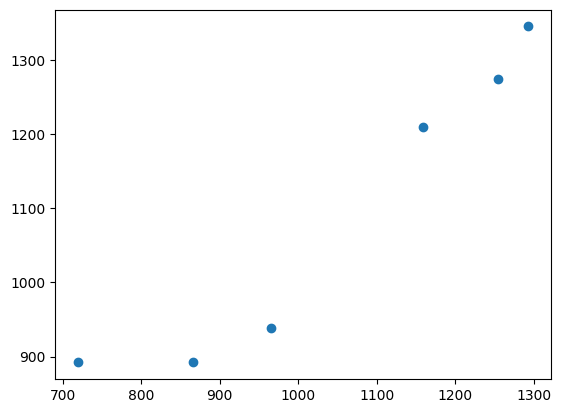

In [35]:
plt.scatter(Y_test, Y_pred)

there is a linear relatioship , it means our modle is performing well.

In [ ]:
residuals = Y_test-Y_pred # Residual is the error
print(residuals)

8     -50.615890
23   -173.013336
5     -20.194027
13     25.875094
3     -51.861382
19    -26.013336
Name: index_price, dtype: float64


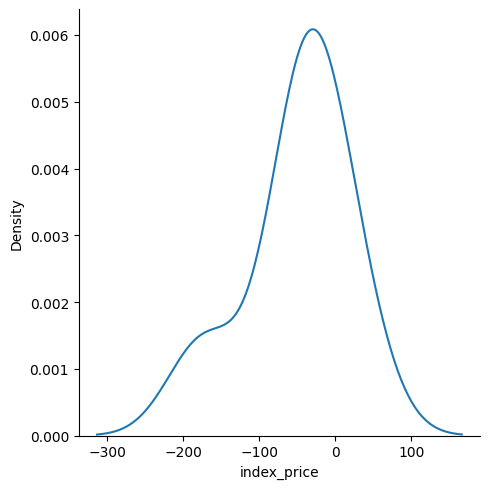

In [37]:
# Plot the residuals

sns.displot(residuals,kind='kde')

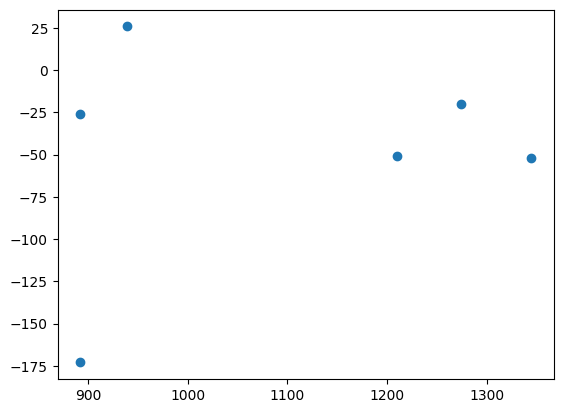

In [39]:
# scatterplot with respect to prediction and resudials

plt.scatter(Y_pred, residuals)

It is uniformally distributed so it is good , if it follows a pattern means something is wrong.

In [40]:
# OLS Linear regression 
import statsmodels.api as sm
model = sm.OLS(Y_train,X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[ 130.39366809 -187.20888638  194.97180483 -140.09731614  265.6391602
 -187.20888638]


In [18]:
import pickle
pickle.dump(regression,open("regression.pkl","wb"))

In [20]:
model=pickle.load(open("regression.pkl","rb"))